In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import *

In [2]:
data=pd.read_csv("Position_Salaries.csv")

In [3]:
print(data)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [ ]:
data.isnull().count()

Position    10
Level       10
Salary      10
dtype: int64

In [ ]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [ ]:
x=data.drop(columns=["Position","Salary"],axis=1)
x

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [ ]:
y=data["Salary"]
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [ ]:
linear_model=LinearRegression()
linear_model.fit(x,y)

LinearRegression()

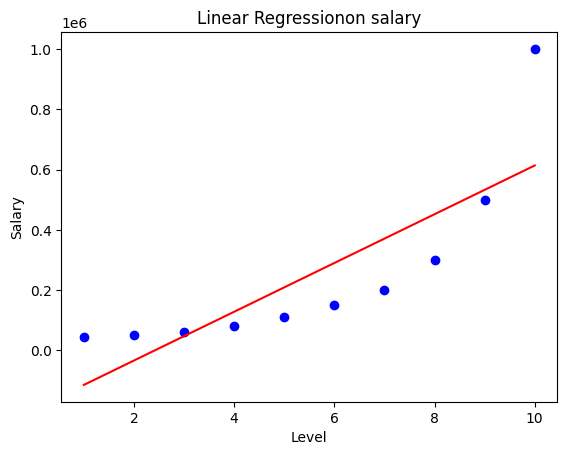

In [ ]:
plt.scatter(x,y,color='blue')
plt.plot(x,linear_model.predict(x),color='red')
plt.title("Linear Regressionon salary")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [ ]:
training_data=linear_model.predict(x)
accuracy_sc= r2_score(training_data,y)
accuracy_sc

0.5053238120653423

In [ ]:
poly_model_2=PolynomialFeatures(degree=2)
X_poly_2=poly_model_2.fit_transform(x)
linear_reg_2=LinearRegression()
linear_reg_2.fit(X_poly_2,y)

LinearRegression()

In [ ]:
print(X_poly_2)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


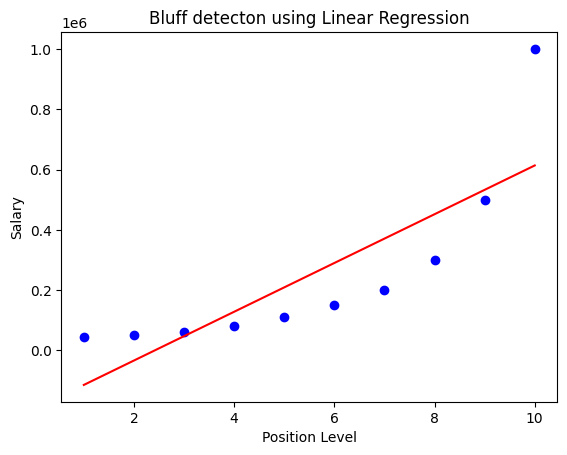

In [ ]:
plt.scatter(x,y,color='blue')
plt.plot(x,linear_model.predict(x),color='red')
plt.title("Bluff detecton using Linear Regression")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()


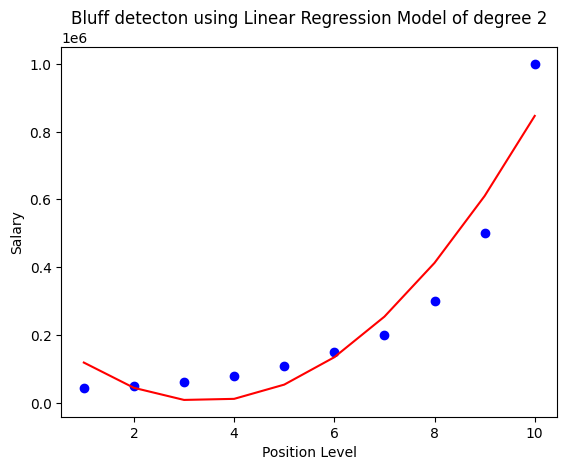

In [ ]:
plt.scatter(x,y,color='blue')
plt.plot(x,linear_reg_2.predict(poly_model_2.fit_transform(x)),color='red')
plt.title("Bluff detecton using Linear Regression Model of degree 2")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()


In [ ]:
linear_model_prediction=linear_model.predict([[6.5]])
print(linear_model_prediction)

[330378.78787879]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
poly_model_2_prediction=linear_reg_2.predict(poly_model_2.fit_transform([[6.5]]))
poly_model_2_prediction

array([189498.10606061])

In [ ]:
linear_model.intercept_

-195333.33333333337

In [ ]:
linear_model.coef_

array([80878.78787879])

In [ ]:
y=80878.787878*6.5+-195333.333
y

330378.788207

In [ ]:
linear_reg_2.coef_

array([      0.        , -132871.21212121,   19431.81818182])

In [ ]:
linear_reg_2.intercept_

232166.6666666664